In [1]:
import gym
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Environment --> Frozen Lake-Donmuş Göl
#     S : starting point , safe 
#     F : frozen surface , safe 
#     H : hole , stuck forever 
#     G : goal , safe
# Ajan(model) , environment içinde deneme-yanılma yoluyla actionlar gerçekleştirip bu actionlar sonucunda ortamdan 
# reward(ödül ya da ceza) alıp hedefini gerçekleştirmeye çalışır. Bunu yaparken öğrendiği bilgileri q-table'da tutar.

In [2]:
environment= gym.make("FrozenLake-v1", is_slippery = False, render_mode = "ansi")

In [3]:
environment.reset()

(0, {'prob': 1})

In [4]:
print(environment.render())


SFFF
FHFH
FFFH
HFFG



In [5]:
nb_states = environment.observation_space.n
nb_states

16

In [6]:
nb_action = environment.action_space.n
nb_action

4

In [ ]:
# 4 action ; Move Left: 0  |  Move Down: 1  |  Move Right: 2  |  Move Up: 3 

In [7]:
q_table = np.zeros((nb_states,nb_action))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
action = environment.action_space.sample()

In [11]:
action

3

In [ ]:
# Ajan, environment içinde seçilen action'a göre hareket eder.

In [13]:
new_state, reward , done , info , _ = environment.step(action)

In [14]:
(new_state, reward , done , info)

(0, 0.0, False, False)

In [ ]:
# training : Ajan, environment içinde actionlara göre hareket ederek hedefine ulaşmaya çalışır. Actionlar sonucunda 
# içerisinde bulunduğu state durumlarına göre Q-table oluşur. 

# test : Ajanın, environment içinde q_table'ı kullanarak hareket etmesini ve ödüle ulaşması sağlanır. Test kısmında modelin 
# başarı durumunu gözlemleriz.

Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


100%|██████████| 1000/1000 [00:00<00:00, 1835.61it/s]


Qtable After Training: 
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


100%|██████████| 100/100 [00:00<00:00, 2463.76it/s]


Success rate :  100.0


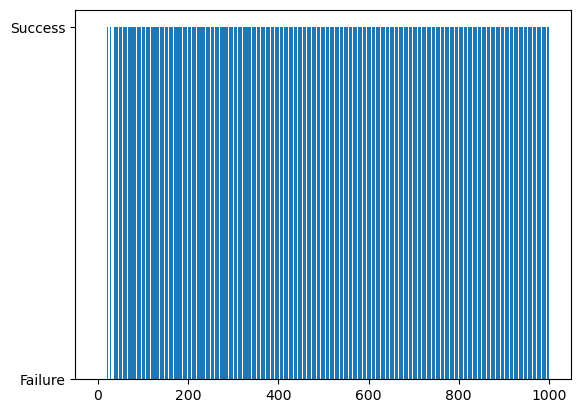

In [15]:
environment= gym.make("FrozenLake-v1", is_slippery = False, render_mode = "ansi")
environment.reset()

# qtable oluşturma
nb_states = environment.observation_space.n 
nb_actions = environment.action_space.n
q_table = np.zeros((nb_states, nb_actions))
print("Q-table")
print(q_table)

episodes = 1000   # episode
alpha = 0.5       # learning rate
gamma = 0.9       # discount rate

outcames = []

#training
for _ in tqdm(range(episodes)):
    
    state, _ = environment.reset()   # ajanın başlangıç state'i
    done = False                     # ajanın başarı durumu
    outcames.append("Failure")
    
    while not done:                  # ajan başarılı olana kdr state içinde hareket et (action seç ve uygula)
        
        # action
        if np.max(q_table[state]) > 0 :
            action = np.argmax(q_table[state])
        else:
            action = environment.action_space.sample()
            
        # ajan actionları environment içinde uygular. (Yeni bir state'e geçer ve reward alır.)
        new_state , reward , done , info , _  = environment.step(action)
        
        # update q table
        q_table[state, action] =  q_table[state, action] + alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])
        
        state = new_state
        
        if reward :             # bölüm bittiyse ajan başarılı olur.
            outcames[-1] = "Success"
            
print("Qtable After Training: ")
print(q_table)

plt.bar(range(episodes), outcames)

# test
episodes = 100
nb_success = 0

for _ in tqdm(range(episodes)):
    
    state, _ = environment.reset()     
    done = False                       
    
    while not done:                    
        if np.max(q_table[state]) > 0 :
            action = np.argmax(q_table[state])
        else:
            action = environment.action_space.sample()
            
        new_state , reward , done , info , _  = environment.step(action)
        state = new_state
        nb_success += reward
        
print("Success rate : ",100*nb_success/episodes)